In [1]:
from typing import Any
from diagrams import Diagram, Cluster, Edge
from diagrams.k8s.group import Namespace
from diagrams.k8s.infra import Node
from diagrams.k8s.compute import Pod
from diagrams.k8s.storage import PVC
from diagrams.onprem.database import Postgresql
from diagrams.onprem.workflow import Airflow

In [2]:
def append_nodes(obj: Any, 
                 title: str, 
                 amount: int) -> Any:
    return [obj(f"{title}-{i}") for i in range(amount)]

In [3]:
with Diagram("Airflow@minikube", show=False) as diag:
    with Cluster("Host"):
        with Cluster("k8s cluster: minikube"):
            with Cluster("Node: minikube"):
                with Cluster("Namespace: airflow"):
                    db = Postgresql("Metadata")
                    pod_triggered = db - Airflow("Scheduler") >> append_nodes(Pod, "DAG_task", 2)
                    pods_airflow = [
                        db - Airflow("Webserver"),
                        pod_triggered,
                    ]

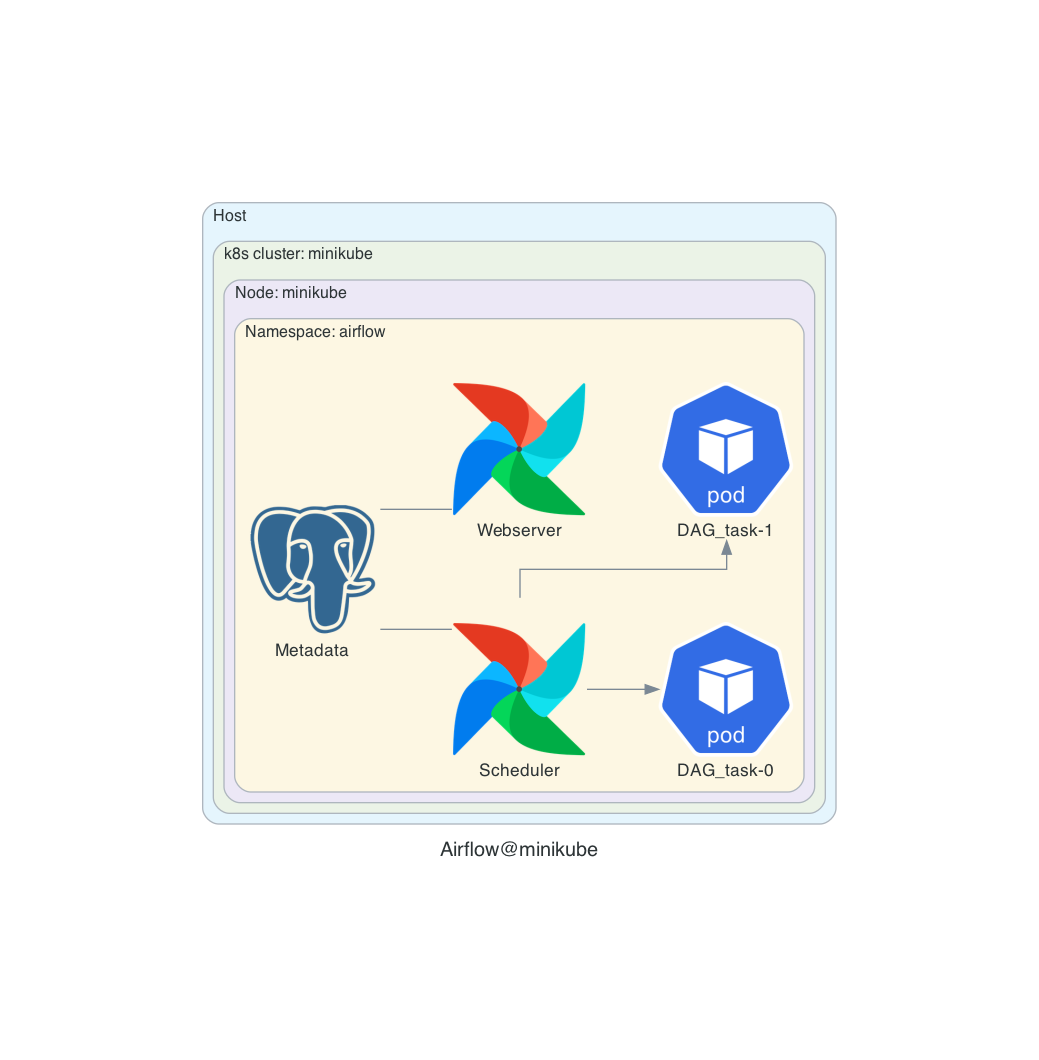

In [4]:
diag